In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("final-data.csv")
df.columns

Index(['Date', 'Vitesse du vent moyen 10 mn', 'Humidité',
       'Variation de pression en 24 heures',
       'Précipitations dans les 24 dernières heures', 'Température (°C)',
       'BONAP:NO2'],
      dtype='object')

In [3]:
# les données météo qu'on a ajouté
added_features = ['Vitesse du vent moyen 10 mn', 'Humidité',
       'Variation de pression en 24 heures',
       'Précipitations dans les 24 dernières heures', 'Température (°C)']

# fill the missing values
df = pd.read_csv("final-data.csv")
df[added_features] = df[added_features].fillna(df[added_features].mean())
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
tst = df[added_features]

On applique l'ACP sur nos features

In [4]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tst)
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
explained_variance_ratio * 100

array([35.72767753, 22.39613844, 19.08570726, 17.20664189,  5.58383488])

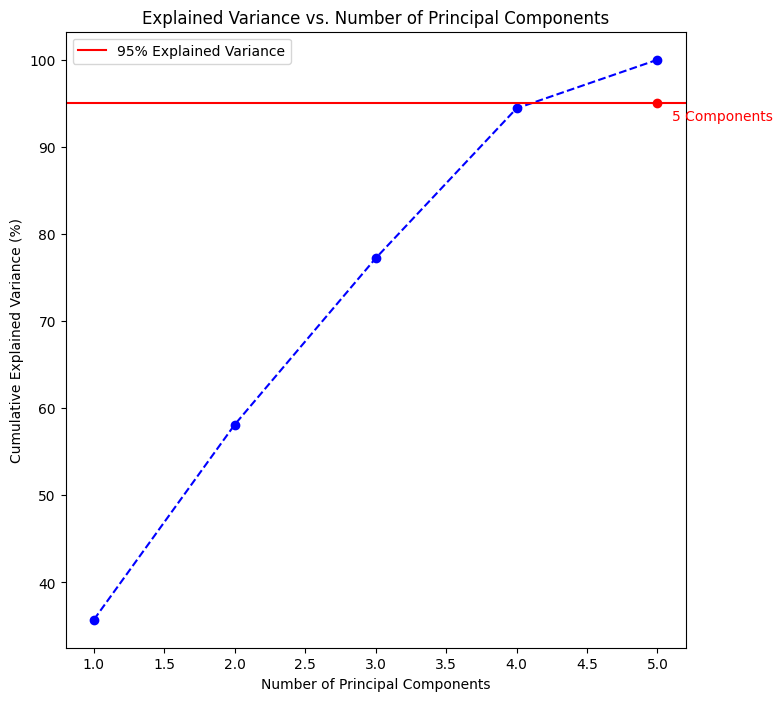

In [5]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio*100)

plt.figure(figsize=(8, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')

plt.axhline(y=95, color='r', linestyle='-', label='95% Explained Variance')

# just prendre 95% de la variance totale 
num_components_95 = np.argmax(cumulative_explained_variance >= 95) + 1
plt.scatter(num_components_95, 95, color='r')
plt.text(num_components_95 + 0.1, 95 - 2, f'{num_components_95} Components', color='r')

plt.legend()
plt.show()

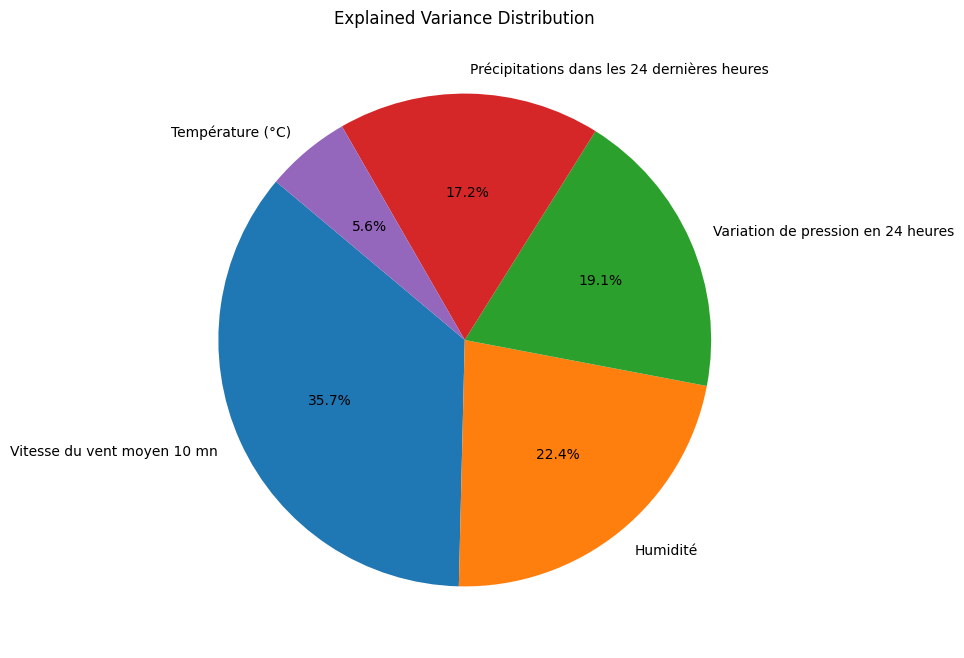

In [6]:
attributs = ['Vitesse du vent moyen 10 mn', 'Humidité',
       'Variation de pression en 24 heures',
       'Précipitations dans les 24 dernières heures', 'Température (°C)']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(explained_variance_ratio, labels=[f'{attributs[i]}' for i in range(len(explained_variance_ratio))],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Explained Variance Distribution')
plt.show()

on peut remarquer que les features n'attribuent pas de façon forte (individuellement) à la variance totale

In [7]:
trainable_cols = ['Date', 'Vitesse du vent moyen 10 mn','Humidité',
       'Variation de pression en 24 heures', 'Température (°C)',
       'BONAP:NO2']
trainable_cols_without_date = ['Vitesse du vent moyen 10 mn','Humidité',
       'Variation de pression en 24 heures',
       'Température (°C)',
       'BONAP:NO2']

df = pd.read_csv("final-data.csv")[trainable_cols]
df

,Date,Vitesse du vent moyen 10 mn,Humidité,Variation de pression en 24 heures,Température (°C),BONAP:NO2
0,2022-01-01 01:00:00,1.8,99,400.0,9.7,39.8
1,2022-01-01 04:00:00,1.5,100,450.0,8.9,29.3
2,2022-01-01 07:00:00,1.0,100,470.0,7.8,25.9
3,2022-01-01 10:00:00,0.6,100,360.0,7.5,19.5
4,2022-01-01 13:00:00,3.6,81,110.0,12.2,26.3
...,...,...,...,...,...,...
2923,2023-01-01 10:00:00,4.9,74,480.0,12.8,16.8
2924,2023-01-01 13:00:00,3.8,82,380.0,12.0,16.8
2925,2023-01-01 16:00:00,2.3,92,230.0,11.1,16.8
2926,2023-01-01 19:00:00,1.2,85,-50.0,11.5,16.8


In [8]:
# fill the missing values
df[trainable_cols_without_date] = df[trainable_cols_without_date].fillna(df[trainable_cols_without_date].mean())

In [9]:
df.isna().sum()

Date                                  0
Vitesse du vent moyen 10 mn           0
Humidité                              0
Variation de pression en 24 heures    0
Température (°C)                      0
BONAP:NO2                             0
dtype: int64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
df

,Vitesse du vent moyen 10 mn,Humidité,Variation de pression en 24 heures,Température (°C),BONAP:NO2
Date,,,,,
2022-01-01 01:00:00,1.8,99,400.0,9.7,39.8
2022-01-01 04:00:00,1.5,100,450.0,8.9,29.3
2022-01-01 07:00:00,1.0,100,470.0,7.8,25.9
2022-01-01 10:00:00,0.6,100,360.0,7.5,19.5
2022-01-01 13:00:00,3.6,81,110.0,12.2,26.3
...,...,...,...,...,...
2023-01-01 10:00:00,4.9,74,480.0,12.8,16.8
2023-01-01 13:00:00,3.8,82,380.0,12.0,16.8
2023-01-01 16:00:00,2.3,92,230.0,11.1,16.8


<Axes: xlabel='Date'>

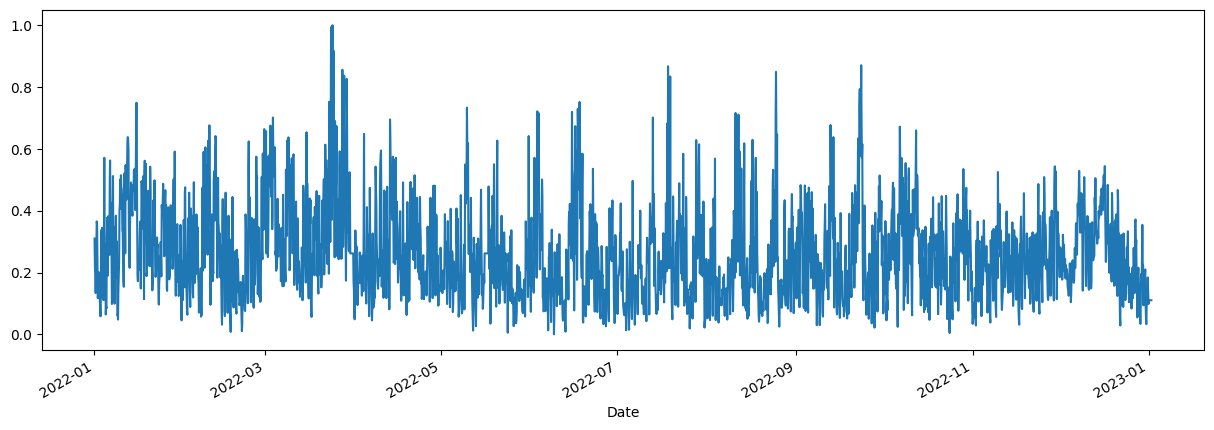

In [12]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(df), # we need to scale the data first
                                     columns=df.columns,
                                     index=df.index)
scaled_price_block_df["BONAP:NO2"].plot(figsize=(15, 5))

In [13]:
# notre paramètres de prédiction
HORIZON = 1
WINDOW_SIZE = 10

df_copy =  df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  df_copy[f"BONAP:NO2+{i+1}"] = df_copy["BONAP:NO2"].shift(periods=i+1)
df_copy

,Vitesse du vent moyen 10 mn,Humidité,Variation de pression en 24 heures,Température (°C),BONAP:NO2,BONAP:NO2+1,BONAP:NO2+2,BONAP:NO2+3,BONAP:NO2+4,BONAP:NO2+5,BONAP:NO2+6,BONAP:NO2+7,BONAP:NO2+8,BONAP:NO2+9,BONAP:NO2+10
Date,,,,,,,,,,,,,,,
2022-01-01 01:00:00,1.8,99,400.0,9.7,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00,1.5,100,450.0,8.9,29.3,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 07:00:00,1.0,100,470.0,7.8,25.9,29.3,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 10:00:00,0.6,100,360.0,7.5,19.5,25.9,29.3,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 13:00:00,3.6,81,110.0,12.2,26.3,19.5,25.9,29.3,39.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 10:00:00,4.9,74,480.0,12.8,16.8,16.8,16.8,16.8,15.4,20.4,25.3,19.7,16.3,14.8,7.9
2023-01-01 13:00:00,3.8,82,380.0,12.0,16.8,16.8,16.8,16.8,16.8,15.4,20.4,25.3,19.7,16.3,14.8
2023-01-01 16:00:00,2.3,92,230.0,11.1,16.8,16.8,16.8,16.8,16.8,16.8,15.4,20.4,25.3,19.7,16.3


In [14]:
x = df_copy.dropna().drop("BONAP:NO2", axis=1)
y = df_copy.dropna()["BONAP:NO2"]

In [15]:
split_size = int(len(x) * 0.8)
X_train, y_train = x[:split_size], y[:split_size]
X_test, y_test = x[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2334, 2334, 584, 584)

<Axes: xlabel='Date'>

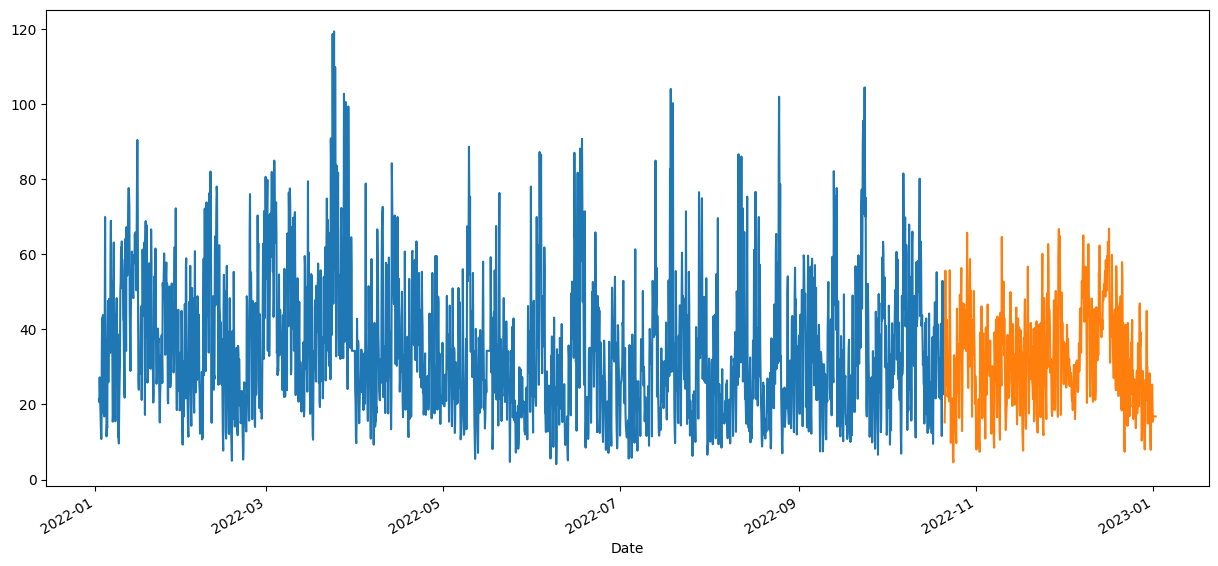

In [16]:
plt.figure(figsize=(15, 7))
y_train.plot()
y_test.plot()

In [17]:
import os
def create_model_checkpoint(model_name, save_path="Multivariate models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_best_only=True) # onlu best model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
tf.random.set_seed(42)
X_train_reshaped, X_test_reshaped = tf.expand_dims(X_train, 2), tf.expand_dims(X_test, 2) 

In [19]:
def rss_loss(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

# LSTM
LSTM_model = Sequential()
LSTM_model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(128, activation='relu', return_sequences=False))
LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(1)) # output Dim 1
opt = Adam(learning_rate=0.000001)
#LSTM_model.compile(loss="mean_absolute_error", optimizer=opt)
LSTM_model.compile(loss = rss_loss, optimizer=opt)


# GRU
GRU_model = Sequential()
GRU_model.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(64, activation='relu', return_sequences=False))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1)) # output
opt = Adam(learning_rate=0.000001)
GRU_model.compile(loss = rss_loss, optimizer=opt) 

# LSTM + GRU
both_model = Sequential()
both_model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
both_model.add(Dropout(0.2))
both_model.add(GRU(64, activation='relu', return_sequences=False))
both_model.add(Dropout(0.2))
both_model.add(Dense(1)) # output 
both_opt = Adam(learning_rate=0.000001)
both_model.compile(loss= rss_loss, optimizer=opt)


# CNN
Conv_model = Sequential()
Conv_model.add(Conv1D(filters=128, kernel_size=3, padding="causal", activation="relu", input_shape=(X_train.shape[1], 1)))
Conv_model.add(MaxPooling1D(pool_size=2))
Conv_model.add(Conv1D(filters=64, kernel_size=3, padding="causal", activation="relu"))
Conv_model.add(MaxPooling1D(pool_size=2))
Conv_model.add(Flatten())
Conv_model.add(Dense(64, activation="relu"))
Conv_model.add(Dropout(0.2))
Conv_model.add(Dense(1))
Conv_opt = Adam(learning_rate=0.000001)

Conv_model.compile(loss=rss_loss, optimizer=Conv_opt)

In [20]:
print("Let's train the Lstm network")
lstm_history = LSTM_model.fit(X_train_reshaped, y_train,
          epochs=2000,
          batch_size=80,
          verbose=1, 
          validation_data=(X_test_reshaped, y_test),
          callbacks=[EarlyStopping(monitor='val_loss', patience=15)])
LSTM_model.save("Multivariate models/LSTM")

print("*"*100)
print("Let's train the Gru network")

GrU_history = GRU_model.fit(X_train_reshaped, y_train,
          epochs=2000,
          batch_size=80,
          verbose=1, 
          validation_data=(X_test_reshaped, y_test),
          callbacks=[EarlyStopping(monitor='val_loss', patience=15)])
GRU_model.save("Multivariate models/GRU")


print("*"*100)
print("Let's train Lstm+Gru network")

both_history = both_model.fit(X_train_reshaped, y_train,
          epochs=2000,
          batch_size=80,
          verbose=1, 
          validation_data=(X_test_reshaped, y_test),
          callbacks=[EarlyStopping(monitor='val_loss', patience=15)])
both_model.save("Multivariate models/GRU+LSTM")




print("Let's train CNN network")
Conv_history = Conv_model.fit(X_train_reshaped, y_train,
            batch_size=80, 
            epochs=2000,
            verbose=1,
            validation_data=(X_test_reshaped, y_test),
            callbacks=[EarlyStopping(monitor='val_loss', patience=15)])
Conv_model.save("Multivariate models/CNN")


Let's train the Lstm network
Epoch 1/2000
30/30 [==============================] - 2s 34ms/step - loss: 153232.0156 - val_loss: 137951.1875
Epoch 2/2000
30/30 [==============================] - 1s 30ms/step - loss: 152406.4062 - val_loss: 134088.5000
Epoch 3/2000
30/30 [==============================] - 1s 29ms/step - loss: 148835.9219 - val_loss: 130258.1406
Epoch 4/2000
30/30 [==============================] - 1s 29ms/step - loss: 147493.3594 - val_loss: 126239.1953
Epoch 5/2000
30/30 [==============================] - 1s 29ms/step - loss: 143018.3594 - val_loss: 122847.6016
Epoch 6/2000
30/30 [==============================] - 1s 29ms/step - loss: 142495.7500 - val_loss: 118960.4141
Epoch 7/2000
30/30 [==============================] - 1s 29ms/step - loss: 139965.7500 - val_loss: 115511.7500
Epoch 8/2000
30/30 [==============================] - 1s 30ms/step - loss: 136622.9062 - val_loss: 112698.9844
Epoch 9/2000
30/30 [==============================] - 1s 32ms/step - loss: 135339.7

INFO:tensorflow:Assets written to: Multivariate models/CNN\assets


INFO:tensorflow:Assets written to: Multivariate models/CNN\assets


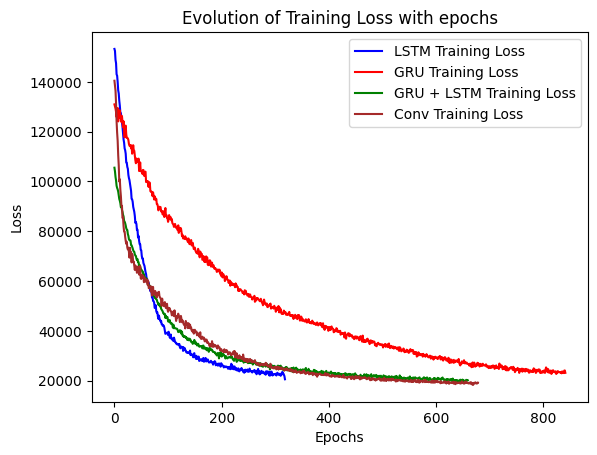

In [21]:
plt.plot(lstm_history.history["loss"], label='LSTM Training Loss', color='blue')
plt.plot(GrU_history.history["loss"], label='GRU Training Loss', color='red')
plt.plot(both_history.history["loss"], label='GRU + LSTM Training Loss', color='green')
plt.plot(Conv_history.history["loss"], label='Conv Training Loss', color='brown')
#plt.plot(Conv_history.history["loss"], label='Conv Training Loss', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolution of Training Loss with epochs')
plt.legend()
plt.show()

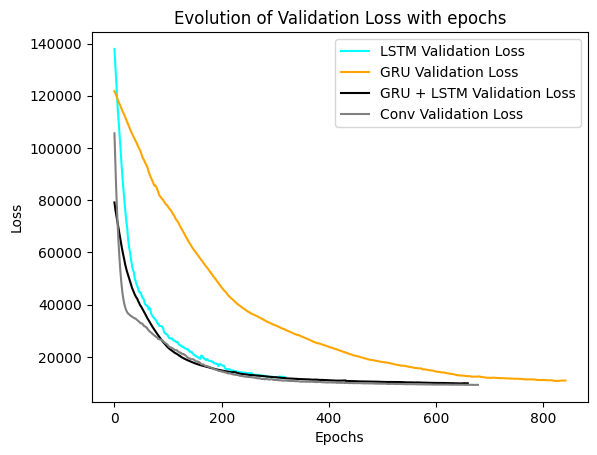

In [22]:
plt.plot(lstm_history.history["val_loss"], label='LSTM Validation Loss', color='cyan')
plt.plot(GrU_history.history["val_loss"], label='GRU Validation Loss', color='orange')
plt.plot(both_history.history["val_loss"], label='GRU + LSTM Validation Loss', color='black')
plt.plot(Conv_history.history["val_loss"], label='Conv Validation Loss', color='grey')
#plt.plot(Conv_history.history["val_loss"], label='Conv Validation Loss', color='grey')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolution of Validation Loss with epochs')
plt.legend()
plt.show()

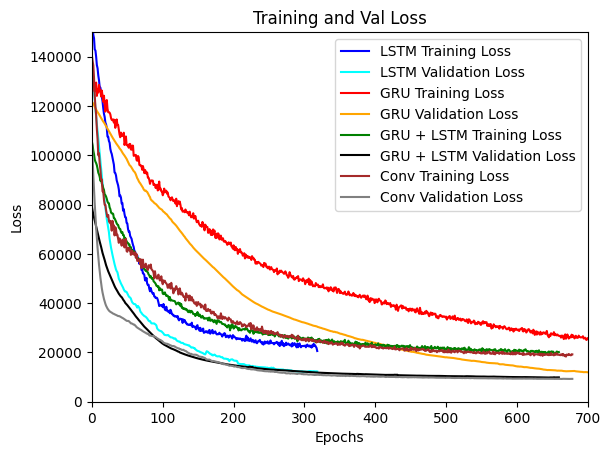

In [23]:
plt.plot(lstm_history.history["loss"], label='LSTM Training Loss', color='blue')
plt.plot(lstm_history.history["val_loss"], label='LSTM Validation Loss', color='cyan')
plt.plot(GrU_history.history["loss"], label='GRU Training Loss', color='red')
plt.plot(GrU_history.history["val_loss"], label='GRU Validation Loss', color='orange')
plt.plot(both_history.history["loss"], label='GRU + LSTM Training Loss', color='green')
plt.plot(both_history.history["val_loss"], label='GRU + LSTM Validation Loss', color='black')
plt.plot(Conv_history.history["loss"], label='Conv Training Loss', color='brown')
plt.plot(Conv_history.history["val_loss"], label='Conv Validation Loss', color='grey')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Val Loss')
plt.legend()
plt.xlim(0, 700)
plt.ylim(0, 150000)

plt.show()

Our evaluation function

In [24]:
from keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# notre fonction d'évaluation

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  
  mae = tf.reduce_mean(mae)
  mse = tf.reduce_mean(mse)
  rmse = tf.reduce_mean(rmse)
  mape = tf.reduce_mean(mape)

  return {"mse":mse.numpy()} # On va juste s'interesser en mse
        #{"mae": mae.numpy(),
        #"rmse": rmse.numpy(),
        #"mape": mape.numpy(),
        #"mase": mase.numpy()}

Let's now load our pretrained models

19/19 [==============================] - 0s 8ms/step


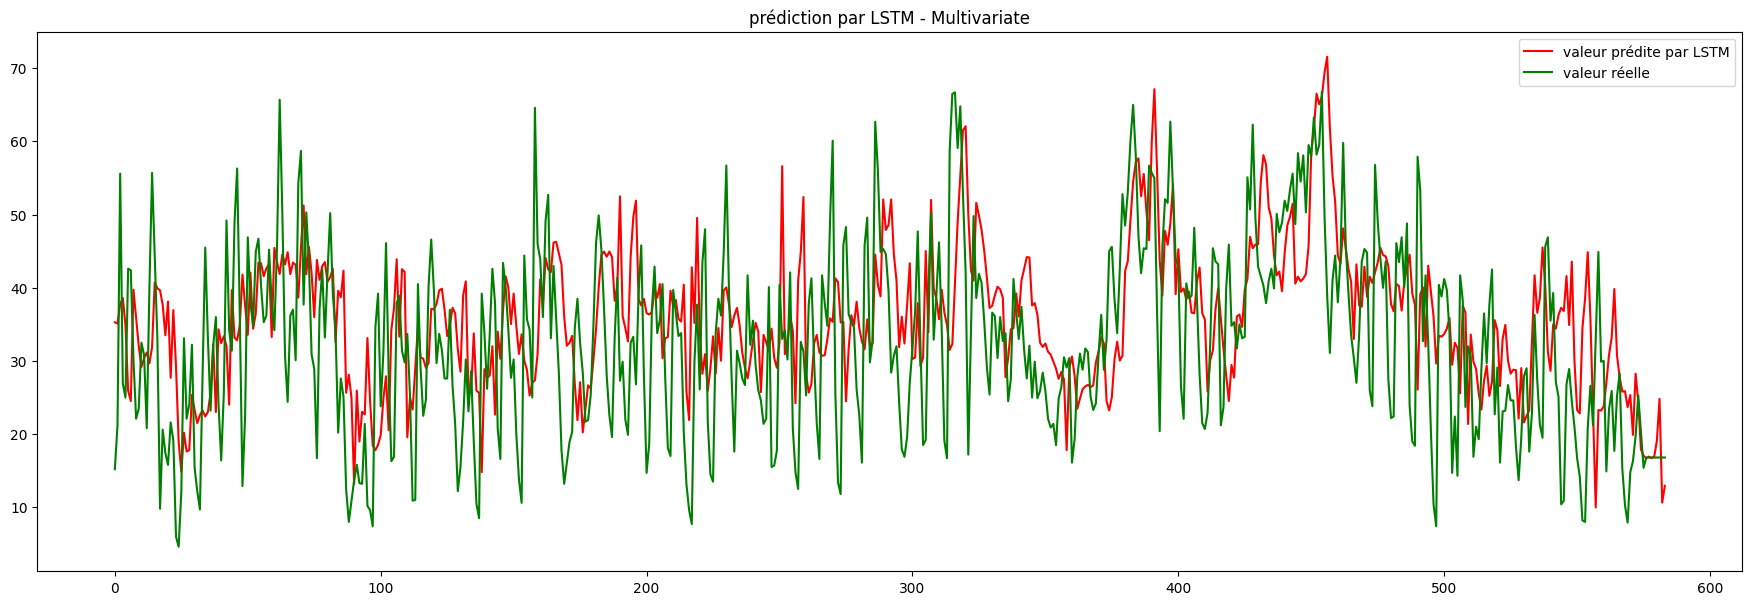

In [25]:
from keras.models import load_model
# Load our lstm model
LSTM_model = load_model("Multivariate models\LSTM", custom_objects={'rss_loss': rss_loss}) 
LSTM_preds = LSTM_model.predict(X_test_reshaped)
LSTM_results = evaluate_preds(y_true=y_test,
                                 y_pred=LSTM_preds)
plt.figure(figsize=(22, 7))
plt.plot(LSTM_preds, color="red", label="valeur prédite par LSTM")
plt.plot(y_test.values, color = "green",label="valeur réelle")
plt.title("prédiction par LSTM - Multivariate")
plt.legend()

19/19 [==============================] - 1s 6ms/step


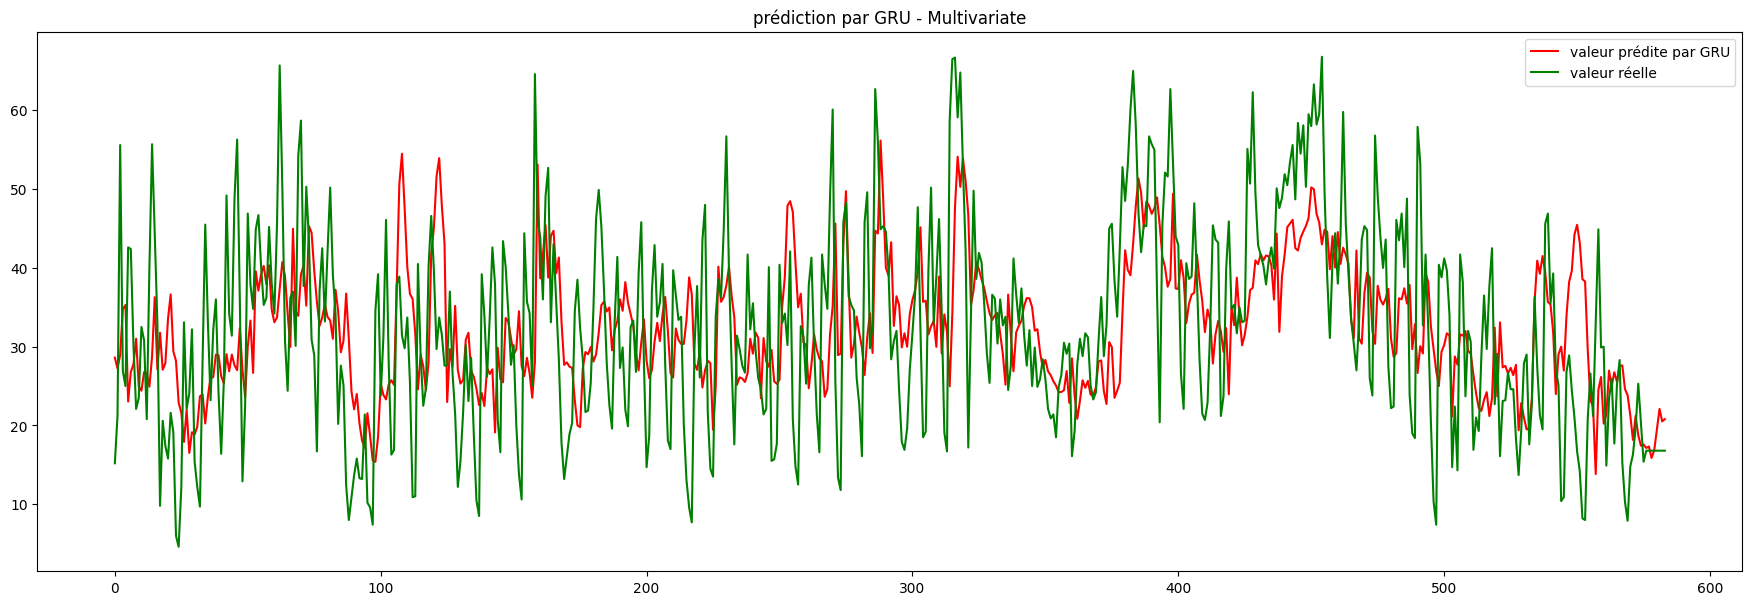

In [26]:
# load our GRU model
GRU_model = load_model("Multivariate models\GRU", custom_objects={'rss_loss': rss_loss}) 
GRU_preds = GRU_model.predict(X_test_reshaped)
GRU_results = evaluate_preds(y_true=y_test,
                                 y_pred=GRU_preds)
plt.figure(figsize=(22, 7))
plt.plot(GRU_preds, color="red", label="valeur prédite par GRU")
plt.plot(y_test.values, color = "green",label="valeur réelle")
plt.title("prédiction par GRU - Multivariate")
plt.legend()

19/19 [==============================] - 1s 8ms/step


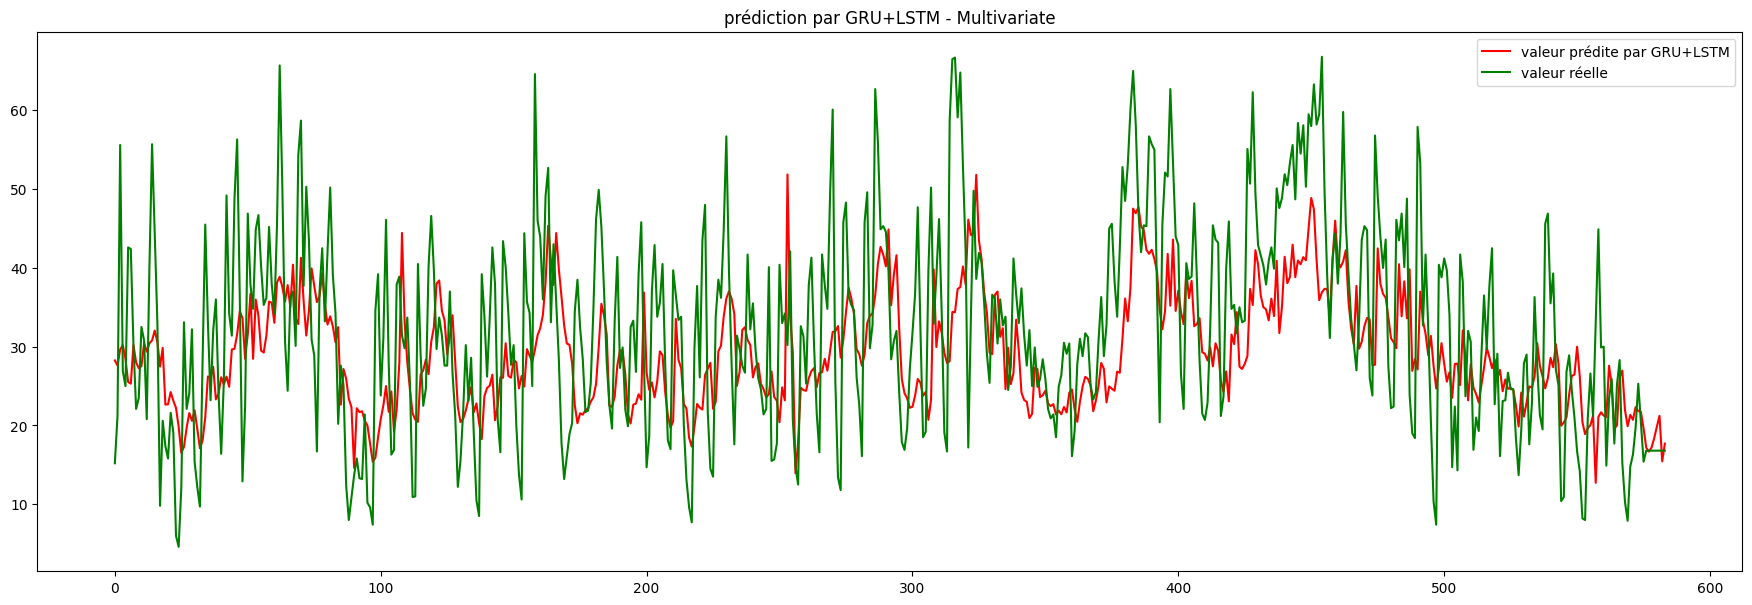

In [27]:
both_model = load_model("Multivariate models\GRU+LSTM", custom_objects={'rss_loss': rss_loss}) 
both_preds = both_model.predict(X_test_reshaped)
both_results = evaluate_preds(y_true=y_test,
                                 y_pred=both_preds)
plt.figure(figsize=(22, 7))
plt.plot(both_preds, color="red", label="valeur prédite par GRU+LSTM")
plt.plot(y_test.values, color = "green",label="valeur réelle")
plt.title("prédiction par GRU+LSTM - Multivariate")
plt.legend()

19/19 [==============================] - 0s 2ms/step


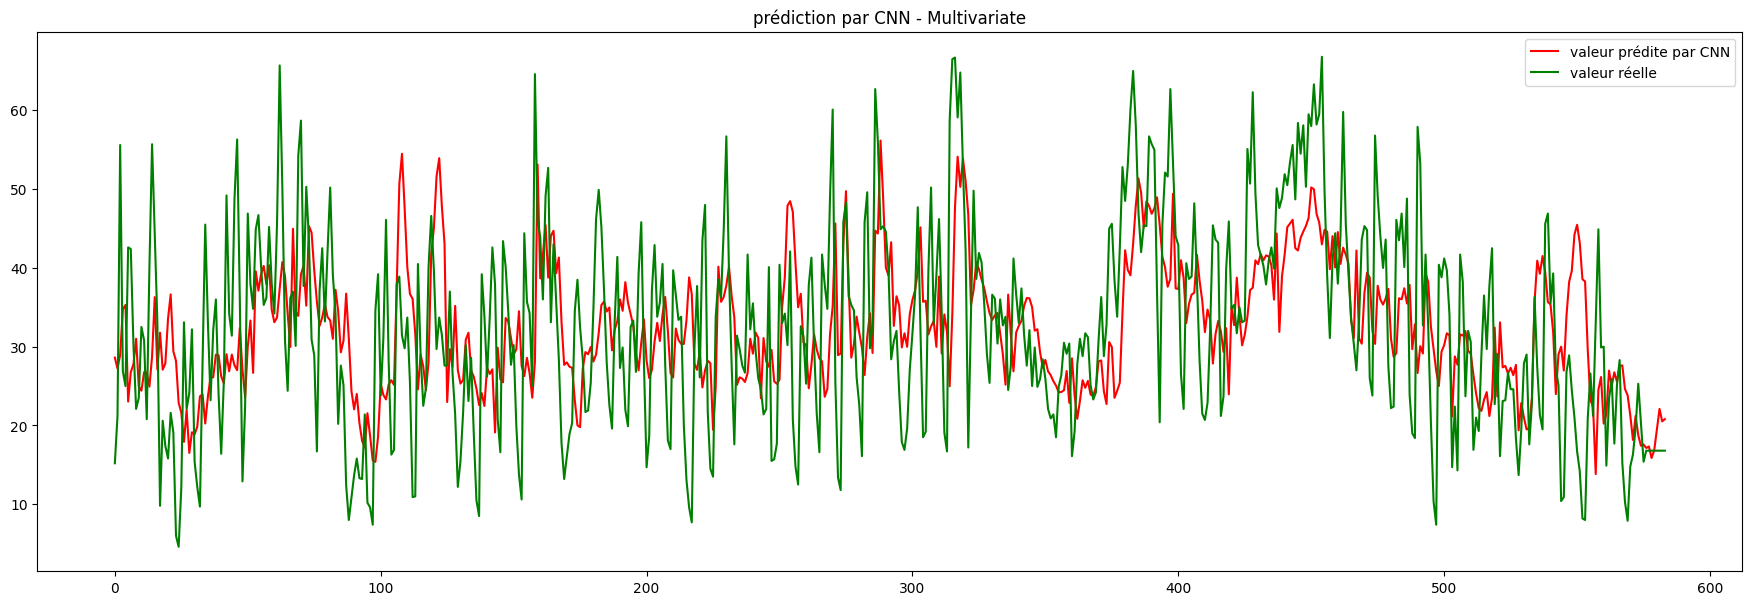

In [28]:
# load our CNN model
CNN_model = load_model("Multivariate models\CNN", custom_objects={'rss_loss': rss_loss}) 
CNN_preds = CNN_model.predict(X_test_reshaped)
CNN_results = evaluate_preds(y_true=y_test,
                                 y_pred=CNN_preds)
plt.figure(figsize=(22, 7))
plt.plot(GRU_preds, color="red", label="valeur prédite par CNN")
plt.plot(y_test.values, color = "green",label="valeur réelle")
plt.title("prédiction par CNN - Multivariate")
plt.legend()

Let's visualize the RSS loss

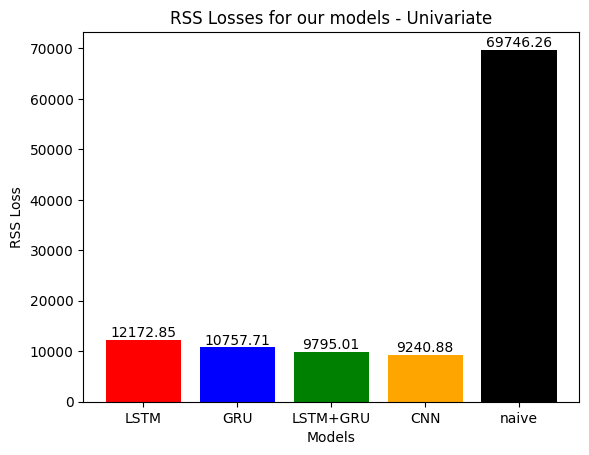

In [29]:
histories = [lstm_history, GrU_history, both_history, Conv_history]
naive_forecast = y_test[:-1]
naive_ = tf.reduce_sum(tf.square(naive_forecast.values - y_test[1:].values))
rss_loss = [min(item.history["val_loss"]) for item in histories] + [naive_.numpy()]

model_names = ['LSTM', 'GRU', 'LSTM+GRU', 'CNN', 'naive']

# Bar plot
plt.bar(model_names, rss_loss, color=["red", "blue", "green", "orange","black"])
plt.xlabel('Models')
plt.ylabel('RSS Loss')
plt.title('RSS Losses for our models - Univariate')

for i, loss in enumerate(rss_loss):
    plt.text(i, loss + 0.1, f'{loss:.2f}', ha='center', va='bottom')

plt.show()


Let's visualize the mse loss

19/19 [==============================] - 0s 2ms/step


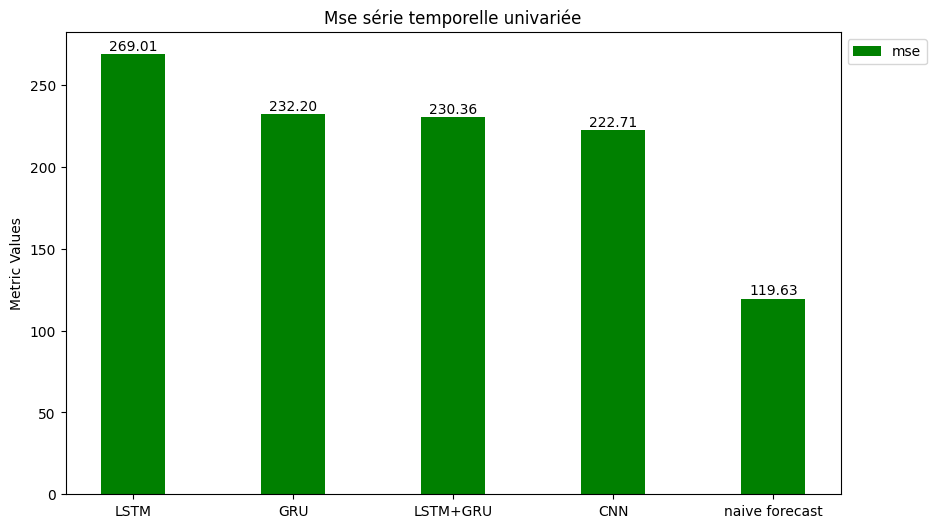

In [30]:
LSTM_preds = LSTM_model.predict(X_test_reshaped)
LSTM_results = evaluate_preds(y_true=y_test,
                                 y_pred=LSTM_preds)
GRU_preds = GRU_model.predict(X_test_reshaped)
GRU_results = evaluate_preds(y_true=y_test,
                                 y_pred=GRU_preds)
both_preds = both_model.predict(X_test_reshaped)
both_results = evaluate_preds(y_true=y_test,
                                 y_pred=both_preds)
Conv_preds = Conv_model.predict(X_test_reshaped)
Conv_results = evaluate_preds(y_true=y_test,
                                 y_pred=Conv_preds)

# naive approache :
naive_forecast = y_test[:-1]
naive_results = evaluate_preds(y_true=y_test[1:],
                                 y_pred=naive_forecast.values)

results= [LSTM_results, GRU_results, both_results, Conv_results, naive_results]

metrics = ['mse']
models = ['LSTM', 'GRU', 'LSTM+GRU', 'CNN', "naive forecast"]

x = np.arange(len(models))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    offset = width * i
    rects = ax.bar(x + offset, [results[j][metric] for j in range(len(results))], width, label=metric, color = "green")
    
    # Add labels manually (horizontally)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Values')
ax.set_title('Mse série temporelle univariée')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the y-axis limits as needed

plt.show()
